# Email Spam Classification

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# dataset 1

In [ ]:
#df1 = pd.read_csv("completeSpamAssassin.csv", encoding='utf-8', error_bad_lines=False)


In [ ]:
df1 = pd.read_csv("completeSpamAssassin.csv", encoding='utf-8')


In [ ]:
#df1 = pd.read_csv("completeSpamAssassin.csv")

In [ ]:
df1.head(10)

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
5,5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1
6,6,Help wanted. We are a 14 year old fortune 500...,1
7,7,ReliaQuote - Save Up To 70% On Life Insurance\...,1
8,8,TIRED OF THE BULL OUT THERE?\nWant To Stop Los...,1
9,9,"Dear ricardo1 ,\nCOST EFFECTIVE Direct Email A...",1


In [ ]:
df1.sample(10)

,Unnamed: 0,Body,Label
5889,5889,\nCNET Shopper Newsletter: PDA Edition\n Shopp...,0
4265,4265,URL: http://boingboing.net/#85534142\nDate: No...,0
697,697,Flat-Rate Unlimited Domestic Calling?How does ...,1
967,967,\nMerchant Account Secrets Revealed\nï¿½TURN B...,1
175,175,Mother Natures all Natural Marital Aid for Men...,1
5610,5610,Michel Alexandre Salim (salimma1@yahoo.co.uk) ...,0
8,8,TIRED OF THE BULL OUT THERE?\nWant To Stop Los...,1
1674,1674,Below is the result of your feedback form. It...,1
3241,3241,Update of /cvsroot/spamassassin/spamassassin/m...,0
5521,5521,"On Fri, 2002-07-19 at 09:09, Jesse Keating wro...",0


In [ ]:
df1.shape

(6046, 3)

In [ ]:
# dataset 2

In [ ]:
df2 = pd.read_csv("spamemails.csv", encoding='utf-8')

In [ ]:
df2.shape

(5572, 5)

## 1. Data Cleaning

In [ ]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [ ]:
df1.isnull().sum()

Unnamed: 0    0
Body          1
Label         0
dtype: int64

In [ ]:
# Drop rows where 'Body' column is NaN or empty
df1.dropna(subset=['Body'], inplace=True)

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df1.sample(10)

,Body,Label
5427,"Or even ""When did Somerville get the internet?...",0
3588,I'm listed as a developer on SF and have the s...,0
337,empty,1
3746,URL: http://boingboing.net/#85482924\nDate: No...,0
4768,"> Curiously, when I go into the boot prom, an...",0
2074,"http://www.guardian.co.uk/uk_news/story/0,3604...",0
2205,R. A. Hettinga wrote:\n> And then there was th...,0
5561,Another thing I see in debian but not in my RH...,0
2709,"Looks useful. Hopefully, they'll put up some m...",0
5988,<!--\n body { BACKGROUND-IMAGE: url(http:...,0


In [ ]:
df1.shape

(6045, 2)

In [ ]:
df1.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [ ]:
# dataset 2

In [ ]:
 df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df2.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df2.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
# renaming the cols
df2.rename(columns={'v1':'Label','v2':'Body'},inplace=True)
df2.sample(5)

,Label,Body
4516,ham,"Men always needs a beautiful, intelligent, car..."
841,ham,Pls send me a comprehensive mail about who i'm...
1426,ham,Ok...
5095,ham,K.k.this month kotees birthday know?
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...


In [ ]:
df2.head()

,Label,Body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df2['Label'] = encoder.fit_transform(df2['Label'])

In [ ]:
df2.sample(10)

,Label,Body
2259,0,Ill call you evening ill some ideas.
5252,0,You do your studies alone without anyones help...
4593,0,I had a good time too. Its nice to do somethin...
3562,1,Auction round 4. The highest bid is now å£54. ...
1907,0,ELLO BABE U OK?
2276,0,Love you aathi..love u lot..
2240,0,K I'll call you when I'm close
5330,0,Dude im no longer a pisces. Im an aquarius now.
3528,1,Xmas & New Years Eve tickets are now on sale f...
1339,0,Every monday..nxt week vl be completing..


In [ ]:
df2.duplicated().sum()

414

In [ ]:
df2 = df2.drop_duplicates(keep='first')

In [ ]:
df2.shape

(5158, 2)

In [ ]:
# merging the datasets

In [ ]:
df = pd.merge(df1, df2, on=['Label', 'Body'], how='outer')

In [ ]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
4,##############################################...,1


In [ ]:
df.shape

(11203, 2)

In [ ]:
df.duplicated().sum()

752

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(10451, 2)

In [ ]:
# export dataset

In [ ]:
df.to_csv('spamemailcompletedataset.csv', index=False)

print("Merged dataset saved as spamemailcompletedataset.csv")

Merged dataset saved as spamemailcompletedataset.csv


In [ ]:
df = pd.read_csv("spamemailcompletedataset.csv", encoding='utf-8')

## 2. Exploratory Data Analysis

In [ ]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [ ]:
df["Label"].value_counts()

0    8431
1    2020
Name: Label, dtype: int64

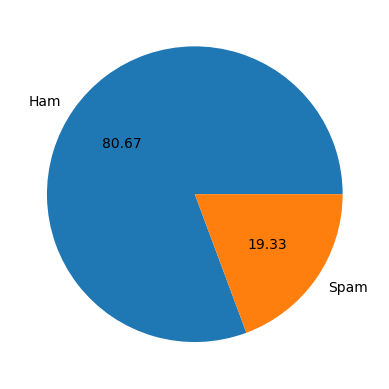

In [ ]:
plt.pie(df['Label'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()

In [ ]:
# Applying the len function only to non-null values in the 'Body' column
df['Char_Count'] = df['Body'].apply(lambda x: len(str(x)))

df.head()

,Body,Label,Char_Count
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610
3,##############################################...,1,2863
4,I thought you might like these:\n1) Slim Down ...,1,641


In [ ]:
df['Word_Count'] = df['Body'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Body,Label,Char_Count,Word_Count
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113
3,##############################################...,1,2863,690
4,I thought you might like these:\n1) Slim Down ...,1,641,108


In [ ]:
df['Sentence_Count'] = df['Body'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(10)

,Body,Label,Char_Count,Word_Count,Sentence_Count
3830,"Howdy all, I have a friend with the problem ou...",0,1209,236,7
5726,Yes..he is really great..bhaji told kallis bes...,0,104,24,1
6580,My exam is for february 4. Wish you a great day.,0,48,13,2
8881,"sorry brah, just finished the last of my exams...",0,55,13,1
5219,<!--\n body { BACKGROUND-IMAGE: url(http:...,0,14800,2993,128
4225,"Hi folks,\nApologies if this is the wrong plac...",0,1302,266,4
10174,I absolutely LOVE South Park! I only recently ...,0,74,14,2
417,\nHOME-MAILERS NEEDED!\n \n$300-$1000 PLUS WE...,1,10219,1955,113
8461,Minimum walk is 3miles a day.,0,29,7,1
5714,7 at esplanade.. Do Ì_ mind giving me a lift c...,0,69,18,1


In [ ]:
df[['Char_Count', 'Word_Count', 'Sentence_Count']].describe()

,Char_Count,Word_Count,Sentence_Count
count,10451.000000,10451.000000,10451.000000
mean,1025.336236,193.151086,7.456703
std,3836.664917,597.737250,20.694056
min,1.000000,0.000000,0.000000
25%,61.000000,14.000000,1.000000
50%,175.000000,37.000000,3.000000
75%,1017.000000,194.000000,7.000000
max,194978.000000,18564.000000,808.000000


In [ ]:
df[df['Label'] == 0][['Char_Count', 'Word_Count', 'Sentence_Count']].describe()

,Char_Count,Word_Count,Sentence_Count
count,8431.000000,8431.000000,8431.000000
mean,870.170205,167.282766,6.294983
std,3530.808360,552.987072,18.419597
min,2.000000,1.000000,1.000000
25%,49.000000,12.000000,1.000000
50%,148.000000,31.000000,2.000000
75%,877.000000,173.500000,6.000000
max,194978.000000,18564.000000,808.000000


In [ ]:
df[df['Label'] == 1][['Char_Count', 'Word_Count', 'Sentence_Count']].describe()

,Char_Count,Word_Count,Sentence_Count
count,2020.000000,2020.000000,2020.000000
mean,1672.962376,301.119307,12.305446
std,4859.606811,747.006606,27.762316
min,1.000000,0.000000,0.000000
25%,156.000000,32.000000,3.000000
50%,705.000000,123.500000,6.000000
75%,1507.500000,268.000000,11.000000
max,129635.000000,13288.000000,406.000000


<Axes: xlabel='Char_Count', ylabel='Count'>

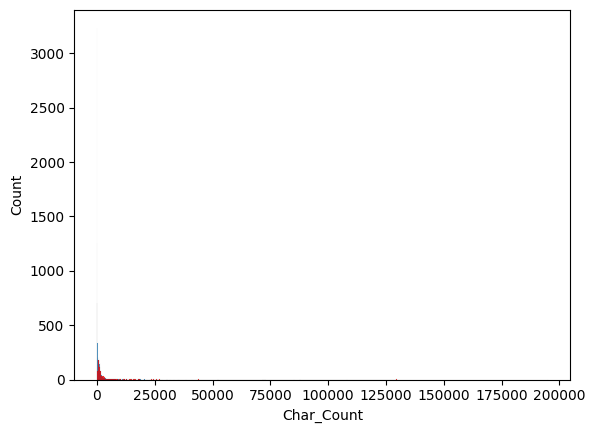

In [ ]:
sns.histplot(df[df['Label'] == 0]['Char_Count'])
sns.histplot(df[df['Label'] == 1]['Char_Count'], color='red')

<Axes: xlabel='Word_Count', ylabel='Count'>

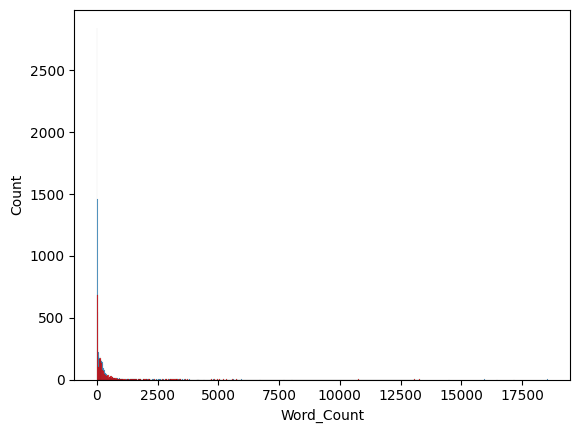

In [ ]:
sns.histplot(df[df['Label'] == 0]['Word_Count'])
sns.histplot(df[df['Label'] == 1]['Word_Count'], color='red')

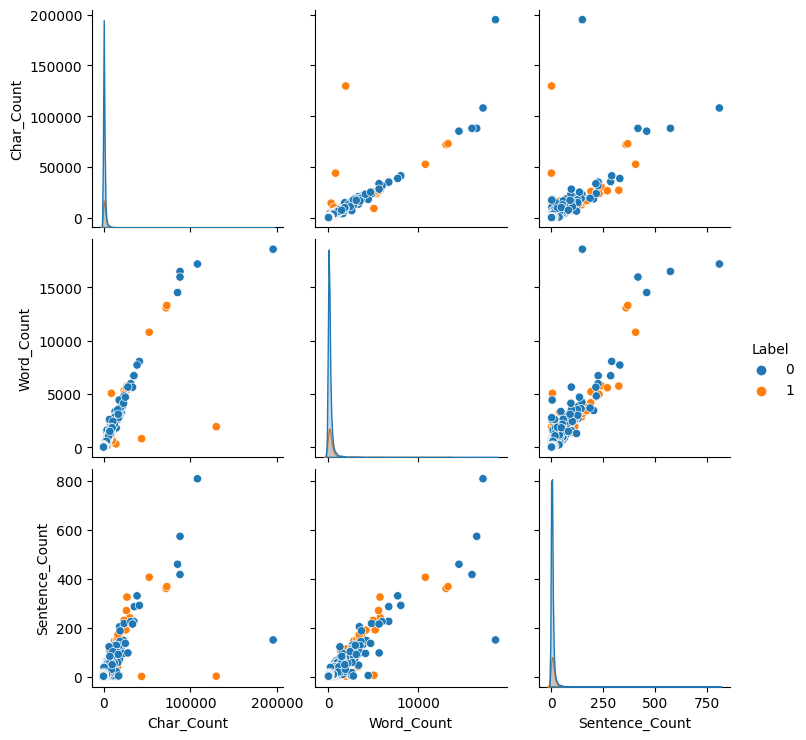

In [ ]:
sns.pairplot(df,hue='Label')

In [ ]:
df.corr()

<ipython-input-59-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Label,Char_Count,Word_Count,Sentence_Count
Label,1.000000,0.082628,0.088418,0.114694
Char_Count,0.082628,1.000000,0.912344,0.786490
Word_Count,0.088418,0.912344,1.000000,0.923864
Sentence_Count,0.114694,0.786490,0.923864,1.000000


<ipython-input-60-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

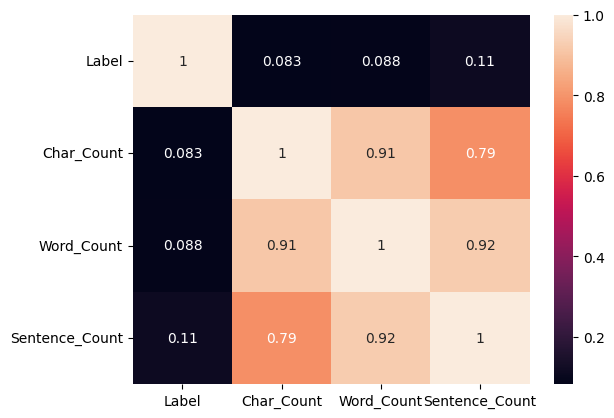

In [ ]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    word_list=[]

    for i in text:
        if i.isalnum():
            word_list.append(i)

    text = word_list[:]
    word_list.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            word_list.append(i)

    text = word_list[:]
    word_list.clear()

    for i in text:
        word_list.append(ps.stem(i))

    return " ".join(word_list)


In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [ ]:
transform_text("Cellular Phone Accessories All At Below Wholesale Prices!http://202.101.163.34:81/sites/merchant/sales/Hands Free Ear Buds 1.99! \nPhone Holsters 1.98! \nBooster Antennas Only $0.99\nPhone Cases 1.98! \nCar Chargers 1.98! \nFace Plates As Low As 0.99! \nLithium Ion Batteries As Low As 6.94! http://202.101.163.34:81/sites/merchant/sales/Click Below For Accessories On All NOKIA, MOTOROLA LG, NEXTEL, \nSAMSUNG, QUALCOMM, ERICSSON, AUDIOVOX PHONES At Below \nWHOLESALE PRICES!http://202.101.163.34:81/sites/merchant/sales/***If You Need Assistance Please Call Us (732) 751-1457***\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nTo be removed from future mailings please send your remove \nrequest to: removemenow68994@btamail.net.cn \nThank You and have a super day :)")

'cellular phone accessori wholesal price http free ear bud phone holster booster antenna phone case car charger face plate low lithium ion batteri low http accessori nokia motorola lg nextel samsung qualcomm ericsson audiovox phone wholesal price http need assist pleas call us 732 remov futur mail pleas send remov request removemenow68994 thank super day'

In [ ]:
df['Body'][10]

'Cellular Phone Accessories All At Below Wholesale Prices!http://202.101.163.34:81/sites/merchant/sales/Hands Free Ear Buds 1.99! \nPhone Holsters 1.98! \nBooster Antennas Only $0.99\nPhone Cases 1.98! \nCar Chargers 1.98! \nFace Plates As Low As 0.99! \nLithium Ion Batteries As Low As 6.94! http://202.101.163.34:81/sites/merchant/sales/Click Below For Accessories On All NOKIA, MOTOROLA LG, NEXTEL, \nSAMSUNG, QUALCOMM, ERICSSON, AUDIOVOX PHONES At Below \nWHOLESALE PRICES!http://202.101.163.34:81/sites/merchant/sales/***If You Need Assistance Please Call Us (732) 751-1457***\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nTo be removed from future mailings please send your remove \nrequest to: removemenow68994@btamail.net.cn \nThank You and have a super day :)'

In [ ]:
df['Transformed_Body'] = df['Body'].apply(transform_text)

In [ ]:
df.sample(10)

,Body,Label,Char_Count,Word_Count,Sentence_Count,Transformed_Body
4204,"> On 0020 +0100 %{!Mon, Aug 19, 2002 at 11:30:...",0,1011,222,8,0020 mon aug 19 2002 anthoni wrote net howev r...
9579,I had a good time too. Its nice to do somethin...,0,106,25,3,good time nice someth bit differ weekend chang...
4451,Whatcha call the guy who hangs out with the ba...,0,889,187,12,whatcha call guy hang band drummer con wed 24 ...
10281,"I can make it up there, squeezed &lt;#&gt; b...",0,64,20,1,make squeez lt gt buck dad
5330,I see the letter B on my car,0,28,8,1,see letter b car
4900,"Hiya folks,I'm currently running RawHide, sinc...",0,850,155,3,hiya folk current run rawhid sinc brilliant id...
4756,"On Sat, Aug 17, 2002 at 01:51:25AM -0400, Gary...",0,1280,251,10,sat aug 17 2002 gari lawrenc murphi wrote choo...
9308,You best watch what you say cause I get drunk ...,0,63,13,1,best watch say caus get drunk motherfuck
6505,Please CALL 08712402779 immediately as there i...,1,81,13,1,pleas call 08712402779 immedi urgent messag wait
4257,"\n Hi all, I'm looking for a copy of the php-m...",0,362,55,4,hi look copi packag php includ former web refe...


In [ ]:
#conda install -c conda-forge wordcloud=1.9.2

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [ ]:
spam_wc = wc.generate(df[df['Label'] == 1]['Transformed_Body'].str.cat(sep = " "))

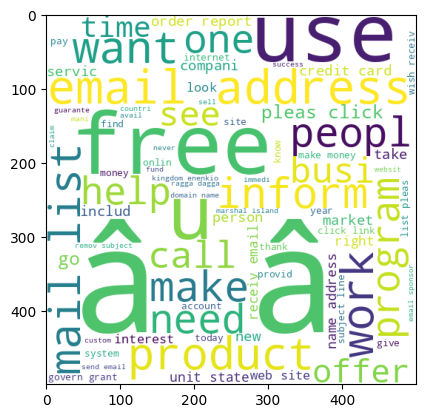

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Label'] == 0]['Transformed_Body'].str.cat(sep = " "))

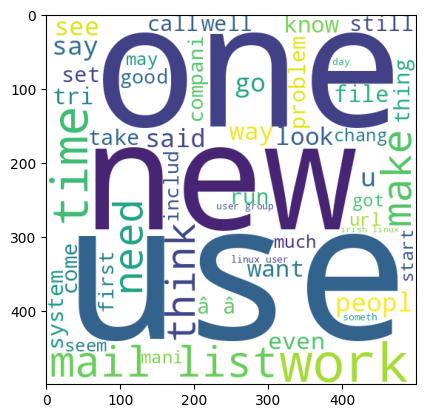

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.head()

,Body,Label,Char_Count,Word_Count,Sentence_Count,Transformed_Body
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,##############################################...,1,2863,690,35,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [ ]:
df[df['Label'] == 1]

,Body,Label,Char_Count,Word_Count,Sentence_Count,Transformed_Body
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,##############################################...,1,2863,690,35,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4,thought might like 1 slim guarante lose lb 30 ...
...,...,...,...,...,...,...
10419,Want explicit SEX in 30 secs? Ring 02073162414...,1,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
10421,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
10428,Had your contract mobile 11 Mnths? Latest Moto...,1,160,35,5,contract mobil 11 mnth latest motorola nokia e...
10445,REMINDER FROM O2: To get 2.50 pounds free call...,1,147,30,1,remind o2 get pound free call credit detail gr...


In [ ]:
spam_corpus = []
for sentence in df[df['Label'] == 1]['Transformed_Body'].tolist():
    for word in sentence.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

262191

In [ ]:
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)

In [ ]:
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

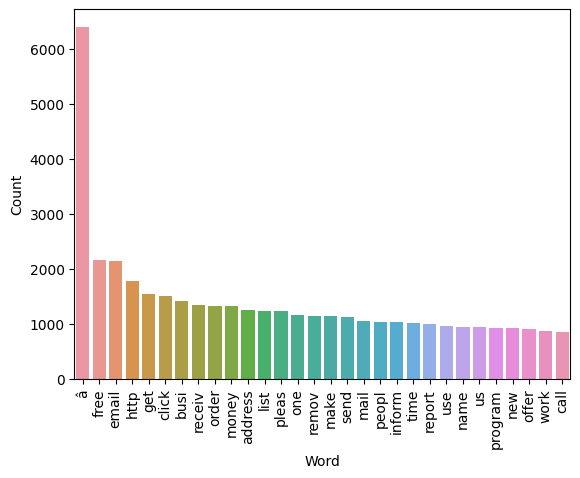

In [ ]:
sns.barplot(x='Word', y='Count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for sentence in df[df['Label'] == 0]['Transformed_Body'].tolist():
    for word in sentence.split():
        ham_corpus.append(word)

In [ ]:
common_words = Counter(ham_corpus).most_common(30)

In [ ]:
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

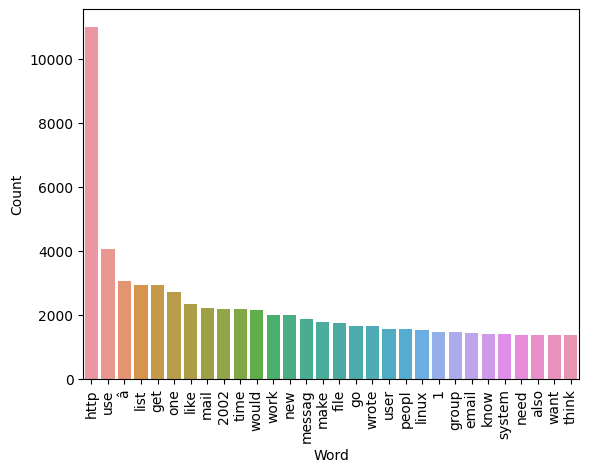

In [ ]:
sns.barplot(x='Word', y='Count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [ ]:
X = tf.fit_transform(df['Transformed_Body']).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(10451, 39667)

In [ ]:
y = df['Label'].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.7790530846484935
0.4554054054054054
[[1292  403]
 [  59  337]]


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9067431850789096
1.0
[[1695    0]
 [ 195  201]]


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.8699186991869918
0.7198581560283688
[[1616   79]
 [ 193  203]]


In [ ]:
# tfidf mnb

In [ ]:
#conda install -c conda-forge xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
classifiers = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(classifiers,X_train,y_train,X_test,y_test):
    classifiers.fit(X_train,y_train)
    y_pred = classifiers.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
#train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,classifier in classifiers.items():

    current_accuracy,current_precision = train_classifier(classifier, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9708273553323769
Precision -  0.9665738161559888
For  KN
Accuracy -  0.8837876614060258
Precision -  0.9811320754716981
For  NB
Accuracy -  0.9067431850789096
Precision -  1.0
For  DT
Accuracy -  0.9043519846963175
Precision -  0.8450704225352113
For  LR
Accuracy -  0.9497847919655668
Precision -  0.924198250728863
For  RF
Accuracy -  0.9636537541846006
Precision -  0.9878048780487805
For  AdaBoost
Accuracy -  0.9464371114299378
Precision -  0.8944444444444445
For  ETC
Accuracy -  0.967479674796748
Precision -  0.9939759036144579
For  GBDT
Accuracy -  0.9387852702056433
Precision -  0.95578231292517
For  xgb
Accuracy -  0.9636537541846006
Precision -  0.9545454545454546


In [ ]:
classifiers

{'SVC': SVC(gamma=1.0, kernel='sigmoid'),
 'KN': KNeighborsClassifier(),
 'NB': MultinomialNB(),
 'DT': DecisionTreeClassifier(max_depth=5),
 'LR': LogisticRegression(penalty='l1', solver='liblinear'),
 'RF': RandomForestClassifier(n_estimators=50, random_state=2),
 'AdaBoost': AdaBoostClassifier(random_state=2),
 'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
 'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2),
 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, ma

In [ ]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.906743,1.000000
7,ETC,0.967480,0.993976
5,RF,0.963654,0.987805
1,KN,0.883788,0.981132
0,SVC,0.970827,0.966574
8,GBDT,0.938785,0.955782
9,xgb,0.963654,0.954545
4,LR,0.949785,0.924198
6,AdaBoost,0.946437,0.894444
3,DT,0.904352,0.845070


In [ ]:
performance_df1 = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df1

,Algorithm,Accuracy,Precision
0,SVC,0.970827,0.966574
7,ETC,0.967480,0.993976
5,RF,0.963654,0.987805
9,xgb,0.963654,0.954545
4,LR,0.949785,0.924198
6,AdaBoost,0.946437,0.894444
8,GBDT,0.938785,0.955782
2,NB,0.906743,1.000000
3,DT,0.904352,0.845070
1,KN,0.883788,0.981132


In [ ]:
performance_df2 = pd.melt(performance_df, id_vars = "Algorithm")

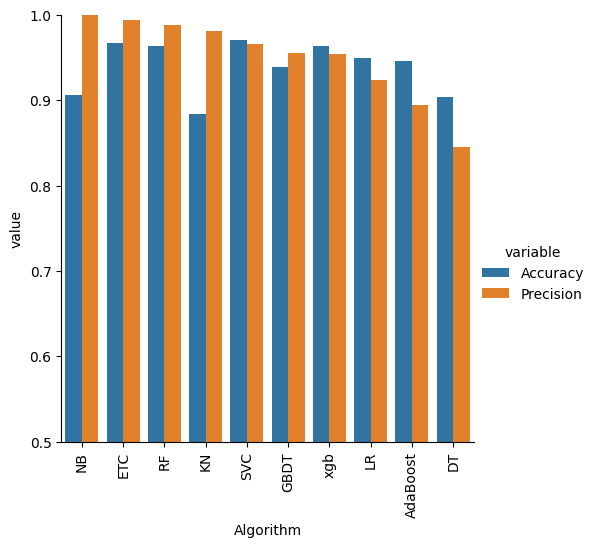

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df2, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
print("les go")

les go


In [ ]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('etc',etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9708273553323769
1.0
[[1695    0]
 [  61  335]]


In [ ]:
X_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#y_pred = voting.predict(X_test[0])

In [ ]:
# export part

In [ ]:
import pickle

pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))

In [ ]:
# input part

In [ ]:
import pickle

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [ ]:
input_email=input("Enter Your Email:")
transformed_email=transform_text(input_email)
#print(transformed_email)
vector_input = tfidf.transform([transformed_email]).toarray()
result = model.predict(vector_input)[0]
if result==1:
  print("Spam")
else:
  print("Ham")
probabilities = model.predict_proba(vector_input)[0]
probability_spam = probabilities[1]  # Probability of being spam

# Display prediction and probability
if probability_spam >= 0.5:
    print(f'The email is predicted to be spam with probability {probability_spam:.2%}.')
else:
    print(f'The email is predicted to be non-spam with probability {(1 - probability_spam):.2%}.')

Enter Your Email:enter this giveaway to win prizes for free. just enter your credit card details to begin.
Spam
The email is predicted to be spam with probability 79.93%.


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
